# Cluster Tree for defining Stationary Domains

In [2]:
import pygeostat as gs
import spatialcluster as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


from proj_variables import *
#from clustering_functions import *

import warnings
warnings.filterwarnings('ignore')


In [3]:
sp.__version__

'0.0.3'

In [16]:
np.__version__

'1.21.0'

In [5]:
print("Spatial Cluster library (Martin&Boisvert, 2018) does necessary Numpy version {} or older!".format(np.__version__))

Spatial Cluster library (Martin&Boisvert, 2018) does necessary Numpy version 1.21.0 or older!


# Defining usual variables

In [6]:
var = ['al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl', 'ppc_gl', 'sio2_gl']
holes = ['bhid']
cat_var = ['lito', 'lito_eval']
coord = ['x', 'y', 'z']
assay = ['from', 'to']


# Defining variable for each cluster node tree

In [7]:
# defining number of clusters for each level

n_clus = [2]

# defining variables for HM and IR classification

var1 = ['fe_gl_std']

# defining variables for IC classification

var2 = ['cao_gl_std', 'mgo_gl_std']

# defining variables for HM and IM classification

var3 = ['mn_gl_std']

# defining variables for HM and IG classification

var4 = ['ppc_gl_std','al2o3_gl_std']

# Defining clustering and metrics functions 

In [8]:
nn = 30
search = [0,0,0,500,500,100]
ntake = 20
    
def run_dsclus(target_data, var, n_clus, label, original_data, col_name):

    mvdata = target_data[var].values
    locations = target_data[['x', 'y', 'z']].values   
    dss = sp.DSSEnsemble(mvdata, locations, nreal=100, nnears=nn, numtake=ntake, rseed=100, searchparams=search)
    dss.fit(n_clus)
    label = dss.predict(n_clus, method='spec')
    original_data.loc[target_data.index, col_name] = label
    target_data.loc[target_data.index, col_name] = label
    

    x=target_data.filter(items=var)
    x=np.array(x)
    y = target_data[col_name]
    y=np.array(y)


    h_ds.append(sp.cluster_metrics_single(target_data[var].values, data[coord].values,target_data[col_name], nnears=nn, searchparams= search))
    ch_ds.append(calinski_harabasz_score(x,y))
    db_ds.append(davies_bouldin_score(x,y))
    sl_ds.append(silhouette_score(x,y))

    

def run_kmeans (target_data, var, n_clus, label, original_data, col_name):

    kmns = KMeans(n_clusters= i, init='k-means++', n_init=300, algorithm='full', random_state=1) 
    kmns.fit(target_data.filter(items=var).values) 
    label = kmns.labels_ 
    original_data.loc[target_data.index, col_name] = label
    target_data.loc[target_data.index, col_name] = label
    
    x=target_data.filter(items=var)
    x=np.array(x)
    y = target_data[col_name]
    y=np.array(y)


    h_km.append(sp.cluster_metrics_single(target_data[var].values, data[coord].values,target_data[col_name], nnears=nn, searchparams= search))
    ch_km.append(calinski_harabasz_score(x,y))
    db_km.append(davies_bouldin_score(x,y))
    sl_km.append(silhouette_score(x,y))
    in_km.append(kmns.inertia_)
       


def run_aggl(target_data, var, n_clus, label, original_data, col_name):

    aggl = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    aggl.fit(target_data.filter(items=var).values)  
    label = aggl.labels_
    original_data.loc[target_data.index, col_name] = label
    target_data.loc[target_data.index, col_name] = label
   
    x=target_data.filter(items=var)
    x=np.array(x)
    y = target_data[col_name]
    y=np.array(y)


    h_ag.append(sp.cluster_metrics_single(target_data[var].values, data[coord].values,target_data[col_name], nnears=nn, searchparams= search))
    ch_ag.append(calinski_harabasz_score(x,y))
    db_ag.append(davies_bouldin_score(x,y))
    sl_ag.append(silhouette_score(x,y))



# Auxiliar plots

In [9]:
def histograms(dataframe, var, label1, label2, label3):
            
    fig, ax = plt.subplots(1, 3, figsize=(30,10))
    
    colors = ["#FF0B04", "#4374B3"]

    sns.set(style='darkgrid')
    sns.set_palette(sns.set_palette(colors))

    
    sns.histplot(data=dataframe, x=var, kde=False, hue=label1, bins=30, ax=ax[0])
    sns.histplot(data=dataframe, x=var, kde=False, hue=label2, bins=30, ax=ax[1])
    sns.histplot(data=dataframe, x=var, kde=False, hue=label3, bins=30, ax=ax[2])

        
    plt.show()




def scatter_plots(dataframe, var1, var2, label1, label2, label3):
    
    fig, ax = plt.subplots(1, 3, figsize=(30,10))
    
    colors = ["#FF0B04", "#4374B3"]

    sns.set(style='darkgrid')
    custom_palette = sns.set_palette(sns.color_palette(colors))

    
    sns.scatterplot(data=dataframe,x = dataframe[var1], y = dataframe[var2], hue=label1, ax=ax[0], palette=custom_palette)
    sns.scatterplot(data=dataframe,x = dataframe[var1], y = dataframe[var2], hue=label2, ax=ax[1], palette=custom_palette)
    sns.scatterplot(data=dataframe,x = dataframe[var1], y = dataframe[var2], hue=label3, ax=ax[2], palette=custom_palette)

    plt.show()

# Import data

In [10]:
data = pd.read_csv('data.csv')
data.columns

Index(['Unnamed: 0', 'ln+_line_number_(readonly)+',
       'rn+_relative_number_(readonly)+', 'xb+_begin_of_sample',
       'yb+_begin_of_sample', 'zb+_begin_of_sample', 'xe+_end_of_sample',
       'ye+_end_of_sample', 'ze+_end_of_sample', 'bhid', 'from', 'to', 'x',
       'y', 'z', 'al2o3_gl', 'cao_gl', 'fe_gl', 'mgo_gl', 'mn_gl', 'p_gl',
       'sio2_gl', 'tio2_gl', 'ppc_gl', 're_gt63c', 'ibs', 'hba', 'ibg', 'ibr',
       'ibm', 'hcp', 'ics', 'icr', 'icg', 'icm', 'icc', 'cp', 'sn', 'eng',
       'lito', 'soma', 'lito_eval', 'evaluation'],
      dtype='object')

#  Preprocessing: Data Transformation

array([[<AxesSubplot:title={'center':'fe_gl'}>,
        <AxesSubplot:title={'center':'fe_gl_std'}>]], dtype=object)

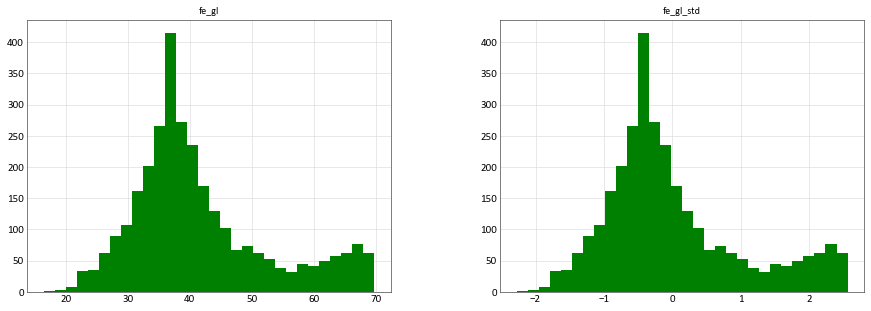

In [11]:
# standardazing all the global variables and getting into a pandas dataframe for manipulating de datasets

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# mean = muito próximo de 0, tende a zer
# std = muito próximo a 1, tende a 1

x = data[var]

x_std = StandardScaler().fit(x).transform(x)

#x_nrm = MinMaxScaler().fit(x).transform(x)

#x_std.shape  --> (3014, 8)   [0,1,2,3,4,5,6,7] dimensions

dimension = range(8)
name = ['al2o3_gl_std', 'cao_gl_std', 'fe_gl_std', 'mgo_gl_std', 'mn_gl_std', 'p_gl_std', 'ppc_gl_std', 'sio2_gl_std']

#name = ['al2o3_gl_nrm', 'cao_gl_nrm', 'fe_gl_nrm', 'mgo_gl_nrm', 'mn_gl_nrm', 'p_gl_nrm', 'ppc_gl_nrm']

for dimensions, names in zip(dimension, name):
    data[names] = x_std[:,dimensions]

# validate histograms of raw and transformed data
#data.columns

data.hist(['fe_gl', 'fe_gl_std'], color='green', figsize=(15,5), bins=30)

# lv1: class1

In [12]:
for i in n_clus:
    run_dsclus(data, var1, i, HM_ITA1_ds, data, 'HM_ITA1_ds')
    run_kmeans(data, var1, i, HM_ITA1_km, data, 'HM_ITA1_km')
    run_aggl(data, var1, i, HM_ITA1_ag, data, 'HM_ITA1_ag')



Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

In [13]:
h_km

[(0.2787812036938978, 0.6151262620109916)]

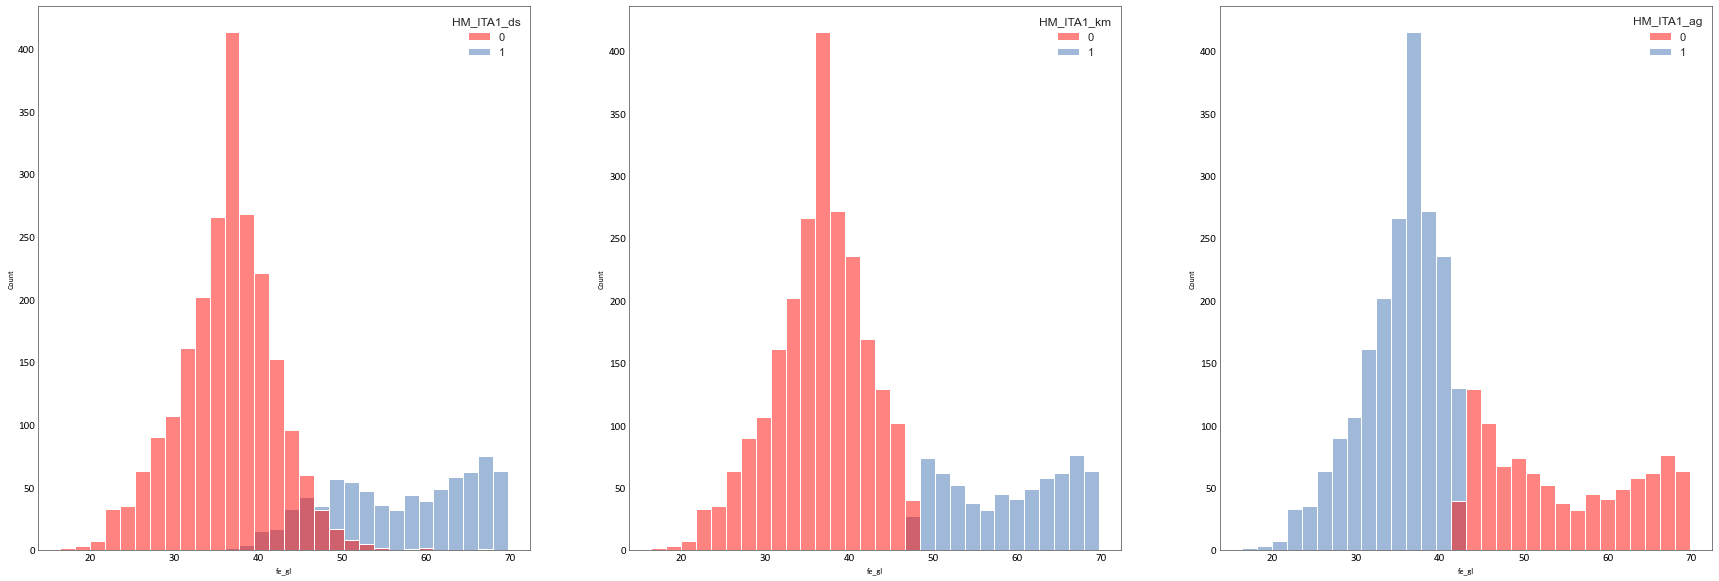

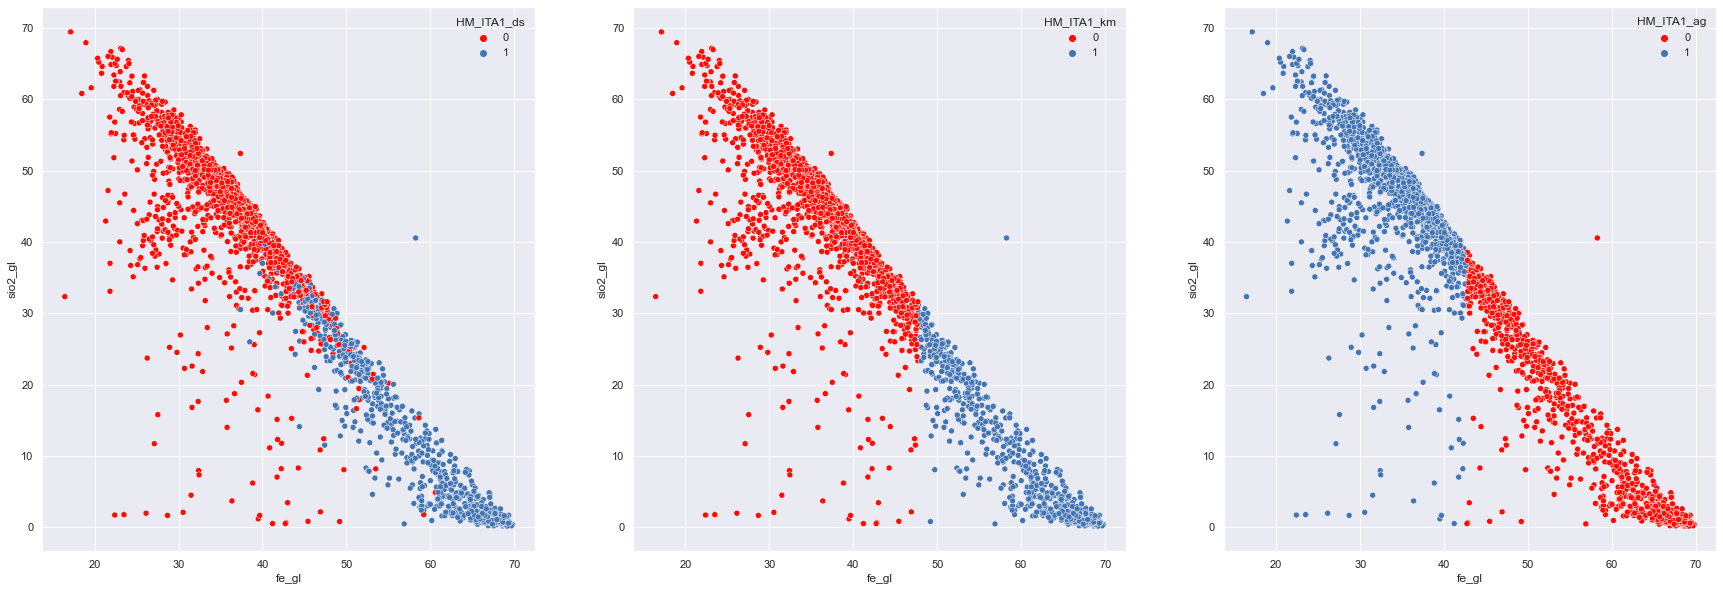

In [33]:
histograms(data, 'fe_gl', 'HM_ITA1_ds', 'HM_ITA1_km', 'HM_ITA1_ag')
scatter_plots(data, 'fe_gl', 'sio2_gl', 'HM_ITA1_ds', 'HM_ITA1_km', 'HM_ITA1_ag')

In [34]:
dfHM_ITA1_ds = data.query('HM_ITA1_ds == 1')
dfHM_ITA1_km = data.query('HM_ITA1_km == 1')
dfHM_ITA1_ag = data.query('HM_ITA1_ag == 0')

# evaluate query
dfHM_ITA1_ds['HM_ITA1_ds'].isin({'HM_ITA1_ds':[1]}).value_counts()



False    764
Name: HM_ITA1_ds, dtype: int64

# lv2: class1

In [35]:
for i in n_clus:

    run_dsclus(dfHM_ITA1_ds, var1, i, HM_ITA2_ds, data, 'HM_ITA2_ds')
    run_kmeans(dfHM_ITA1_km, var1, i, HM_ITA2_km, data, 'HM_ITA2_km')
    run_aggl(dfHM_ITA1_ag, var1, i, HM_ITA2_ag, data, 'HM_ITA2_ag')

Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

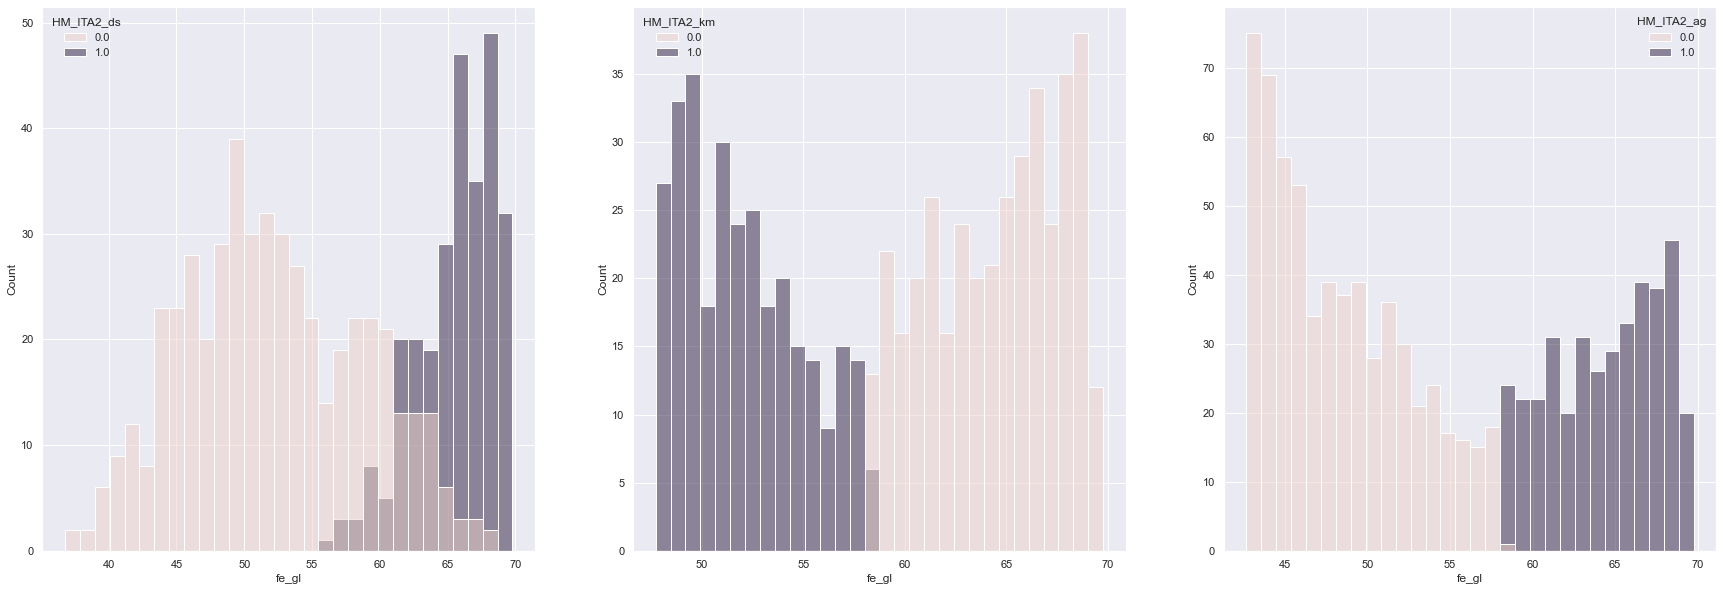

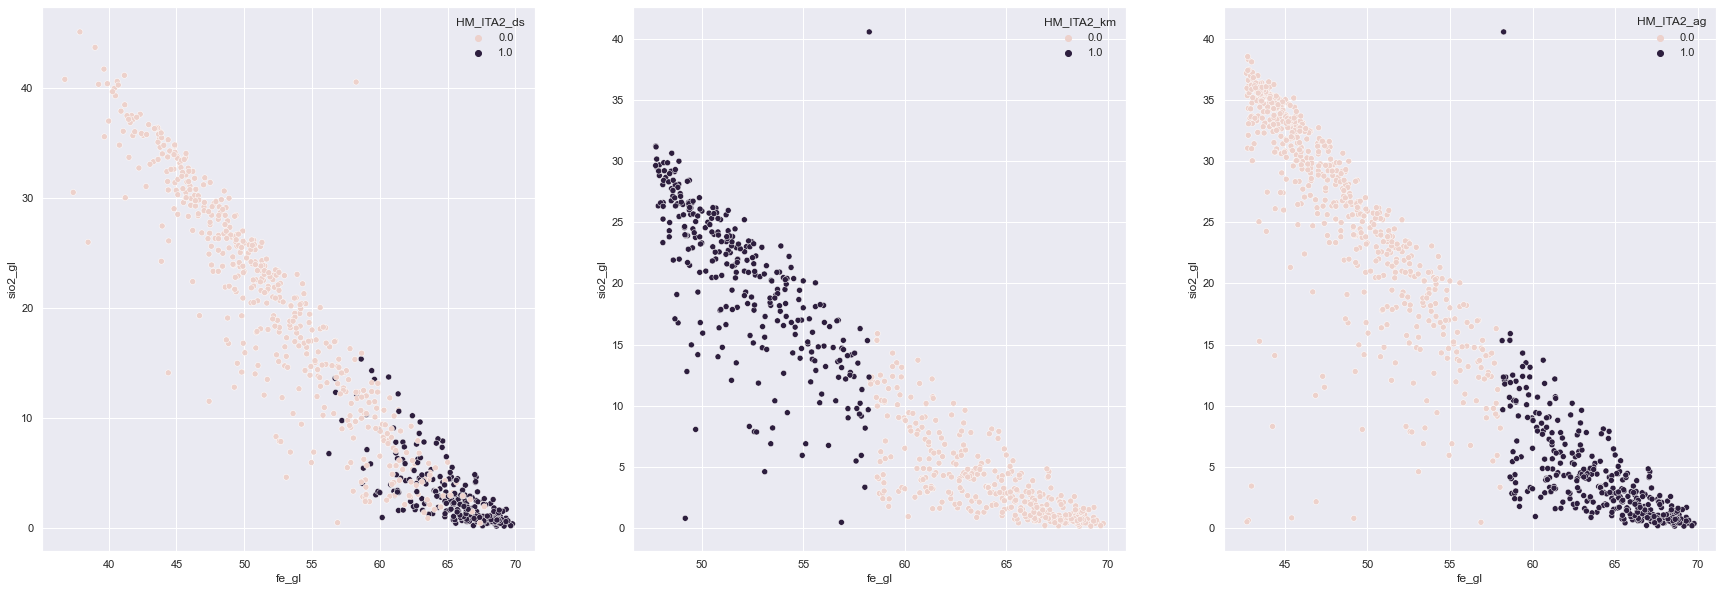

In [36]:
histograms(data, 'fe_gl', 'HM_ITA2_ds', 'HM_ITA2_km', 'HM_ITA2_ag')
scatter_plots(data, 'fe_gl', 'sio2_gl', 'HM_ITA2_ds', 'HM_ITA2_km', 'HM_ITA2_ag')

In [37]:
# Filtering datasets and choosing the labels clustered

dfHM_ITA2_ds = data.query('HM_ITA2_ds == 1')
dfHM_ITA2_km = data.query('HM_ITA2_km == 0')
dfHM_ITA2_ag = data.query('HM_ITA2_ag == 1')

# evaluate query
dfHM_ITA2_ds['HM_ITA2_ds'].isin({'HM_ITA2_ds':[1]}).value_counts()

False    271
Name: HM_ITA2_ds, dtype: int64

LEVEL 1: CLASS HM 3

In [38]:
for i in n_clus:

    run_dsclus(dfHM_ITA2_ds, var1, i, HM_ITA2_ds, data, 'HM_ITA3_ds')
    run_kmeans(dfHM_ITA2_km, var1, i, HM_ITA2_km, data, 'HM_ITA3_km')
    run_aggl(dfHM_ITA2_ag, var1, i, HM_ITA2_ag, data, 'HM_ITA3_ag')

Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

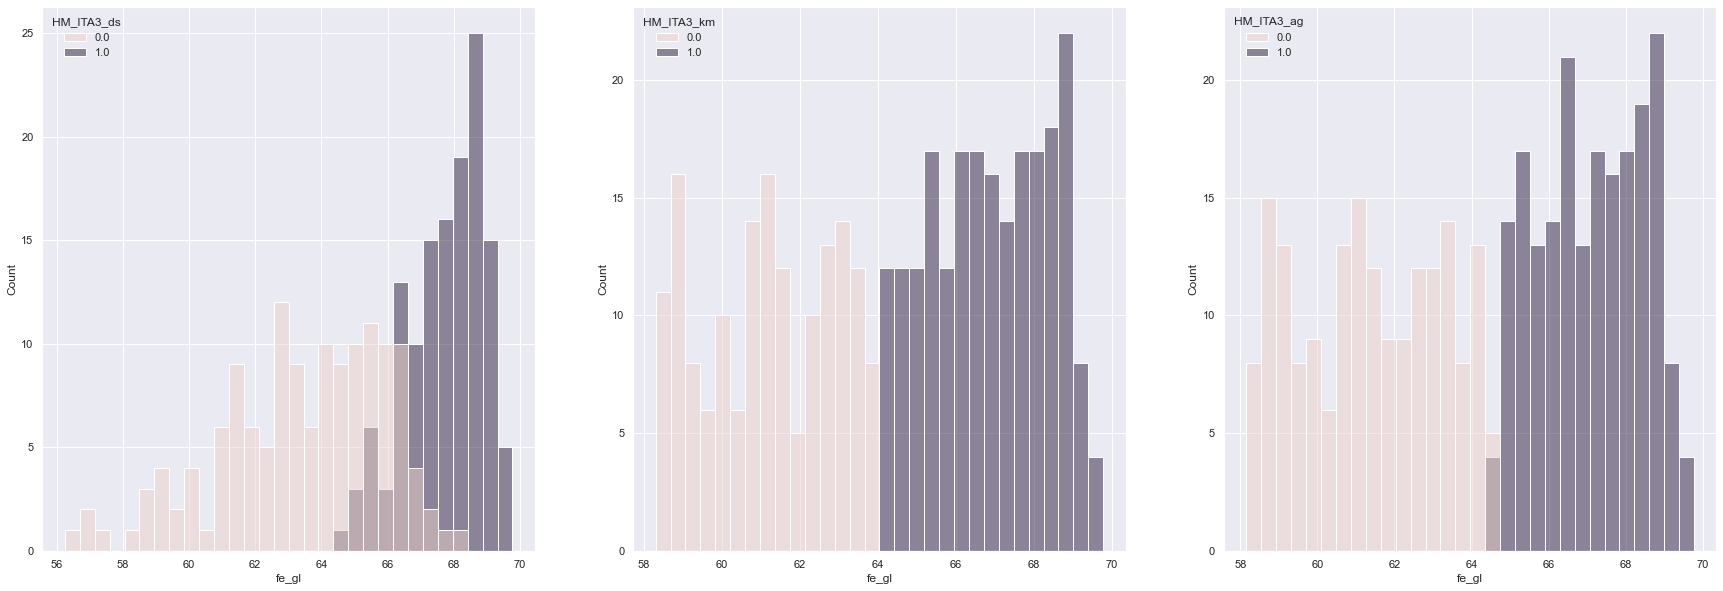

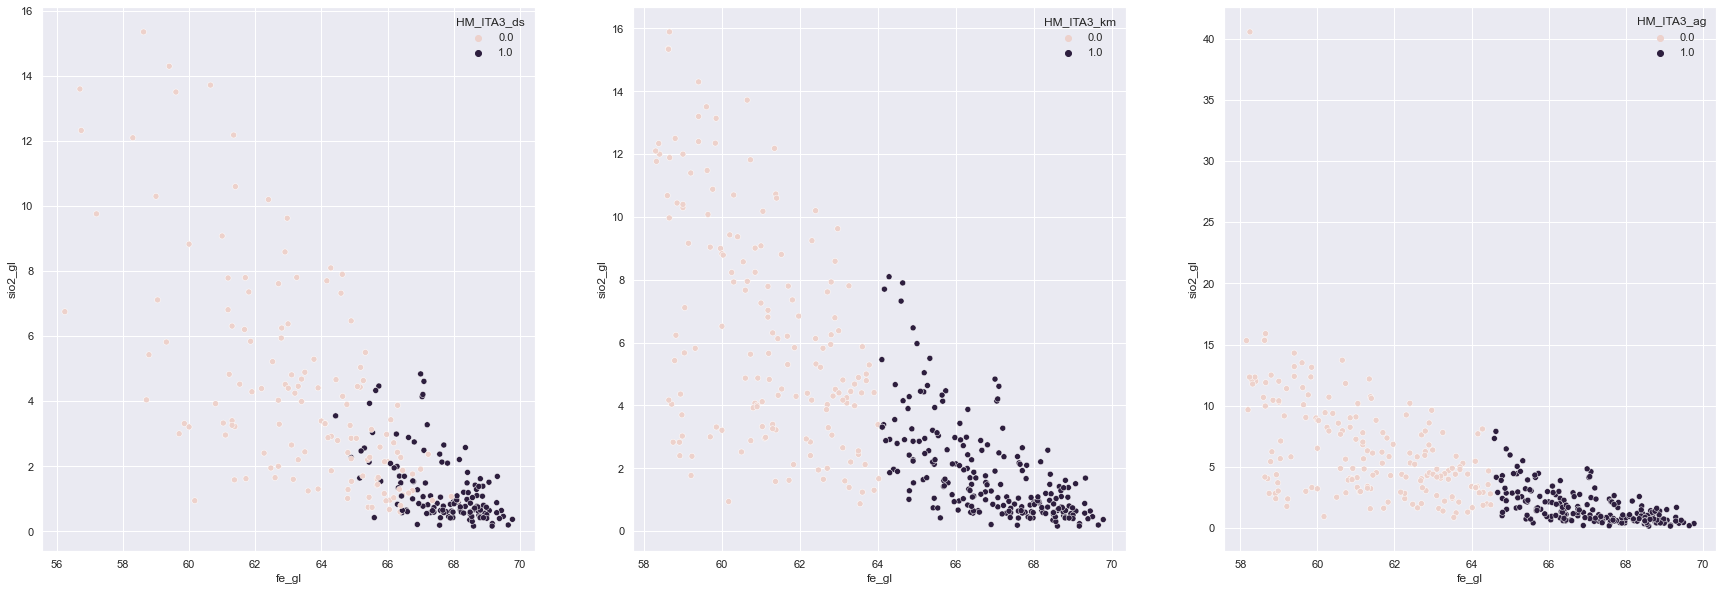

In [39]:
histograms(data, 'fe_gl', 'HM_ITA3_ds', 'HM_ITA3_km', 'HM_ITA3_ag')
scatter_plots(data, 'fe_gl', 'sio2_gl', 'HM_ITA3_ds', 'HM_ITA3_km', 'HM_ITA3_ag')

In [40]:
# replacing last level of HM
data['HM_ITA3_ds'].replace({1:"HM",0:"ITA"},inplace=True)
data['HM_ITA3_km'].replace({1:"HM",0:"ITA"},inplace=True)
data['HM_ITA3_ag'].replace({1:"HM",0:"ITA"},inplace=True)

# filtering datasets for clustering

df_ITA1_ds = data.query('HM_ITA3_ds != "HM"')
df_ITA1_km = data.query('HM_ITA3_km != "HM"')
df_ITA1_ag = data.query('HM_ITA3_ag != "HM"')



LEVEL 2: CLASS IR 1

In [41]:
for i in n_clus:

    run_dsclus(df_ITA1_ds, var1, i, IR_ITA1_ds, data, 'IR_ITA1_ds')
    run_kmeans(df_ITA1_km, var1, i, IR_ITA1_km, data, 'IR_ITA1_km')
    run_aggl(df_ITA1_ag, var1, i, IR_ITA1_ag, data, 'IR_ITA1_ag')


Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

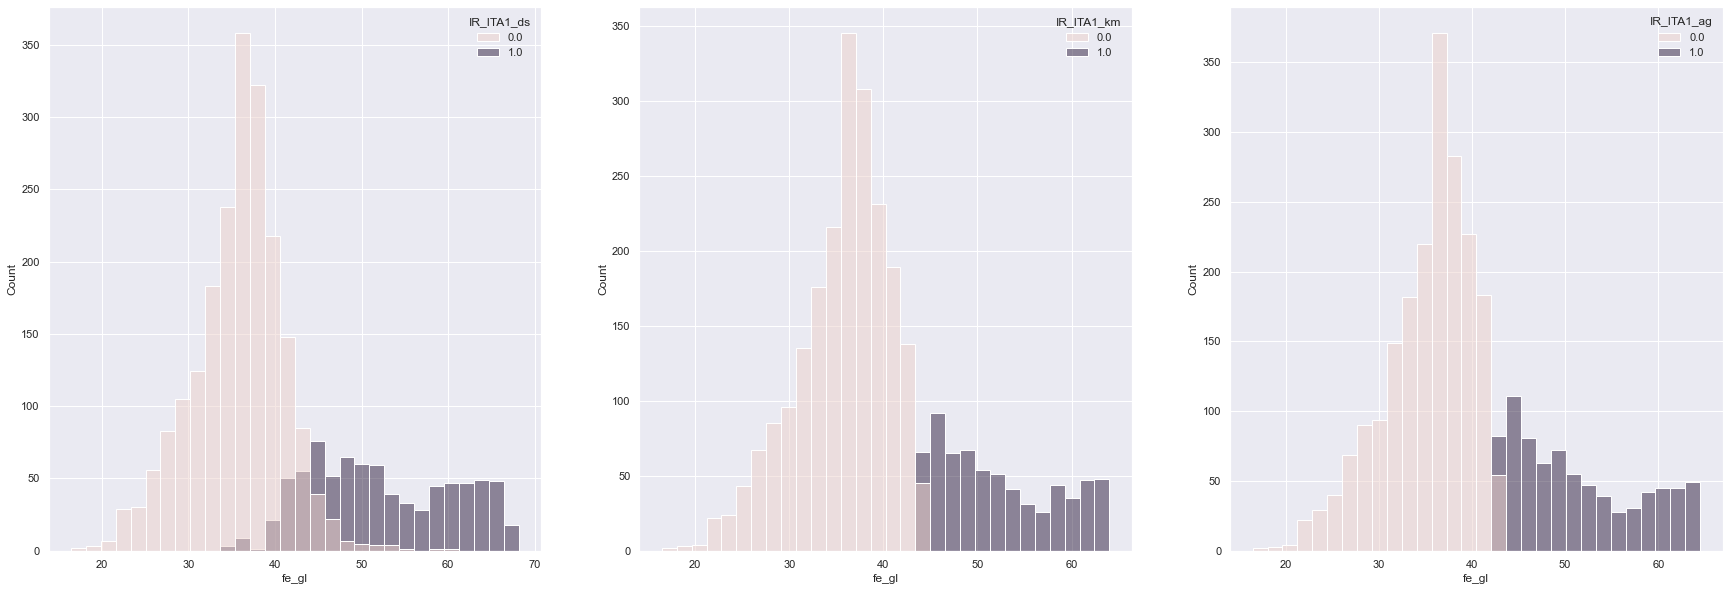

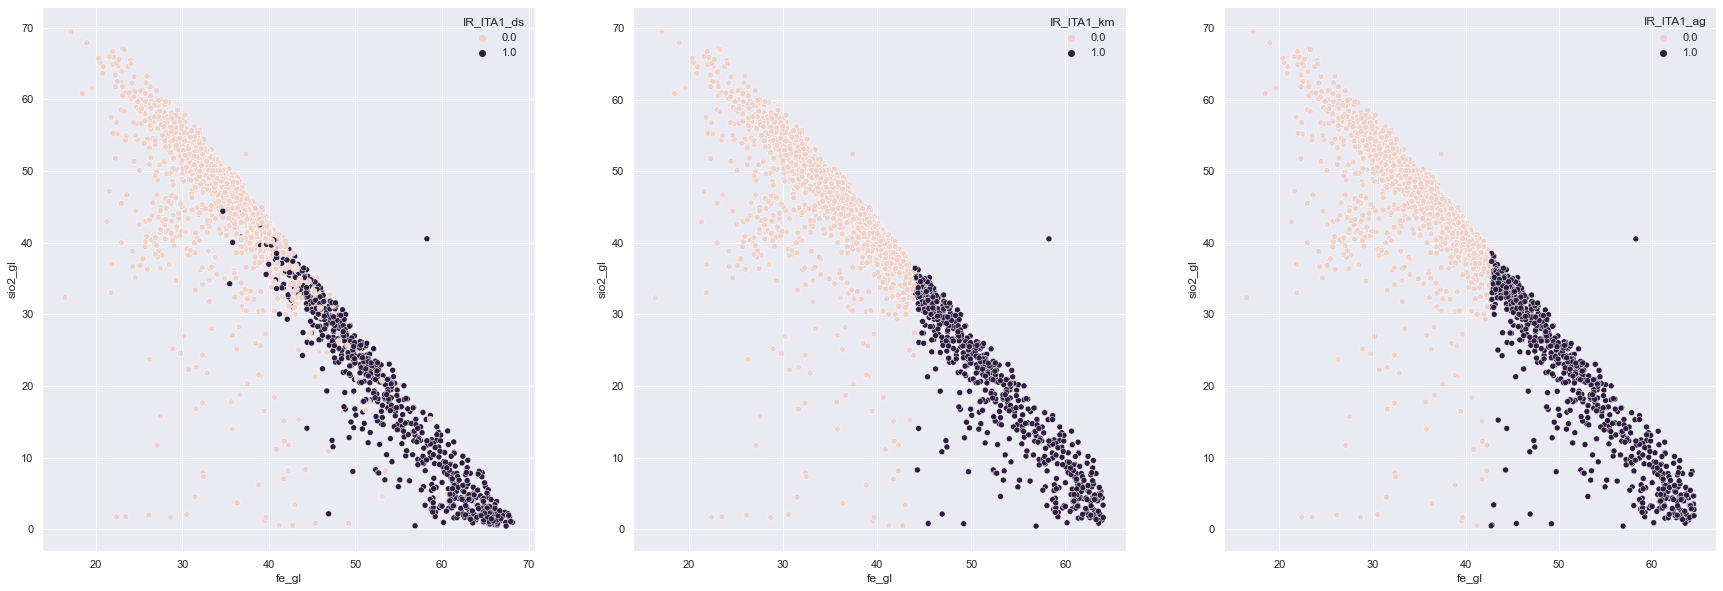

In [42]:
histograms(data, 'fe_gl', 'IR_ITA1_ds', 'IR_ITA1_km', 'IR_ITA1_ag')
scatter_plots(data, 'fe_gl', 'sio2_gl', 'IR_ITA1_ds', 'IR_ITA1_km', 'IR_ITA1_ag')

In [43]:
df_ITA2_ds = data.query('IR_ITA1_ds == 1 & HM_ITA3_ds != "HM"')
df_ITA2_km = data.query('IR_ITA1_km == 1 & HM_ITA3_ds != "HM"')
df_ITA2_ag = data.query('IR_ITA1_ag == 1 & HM_ITA3_ds != "HM"')

LEVEL 2: CLASS IR 2

In [44]:
for i in n_clus:

    run_dsclus(df_ITA2_ds, var1, i, IR_ITA2_ds, data, 'IR_ITA2_ds')
    run_kmeans(df_ITA2_km, var1, i, IR_ITA2_km, data, 'IR_ITA2_km')
    run_aggl(df_ITA2_ag, var1, i, IR_ITA2_ag, data, 'IR_ITA2_ag')

Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

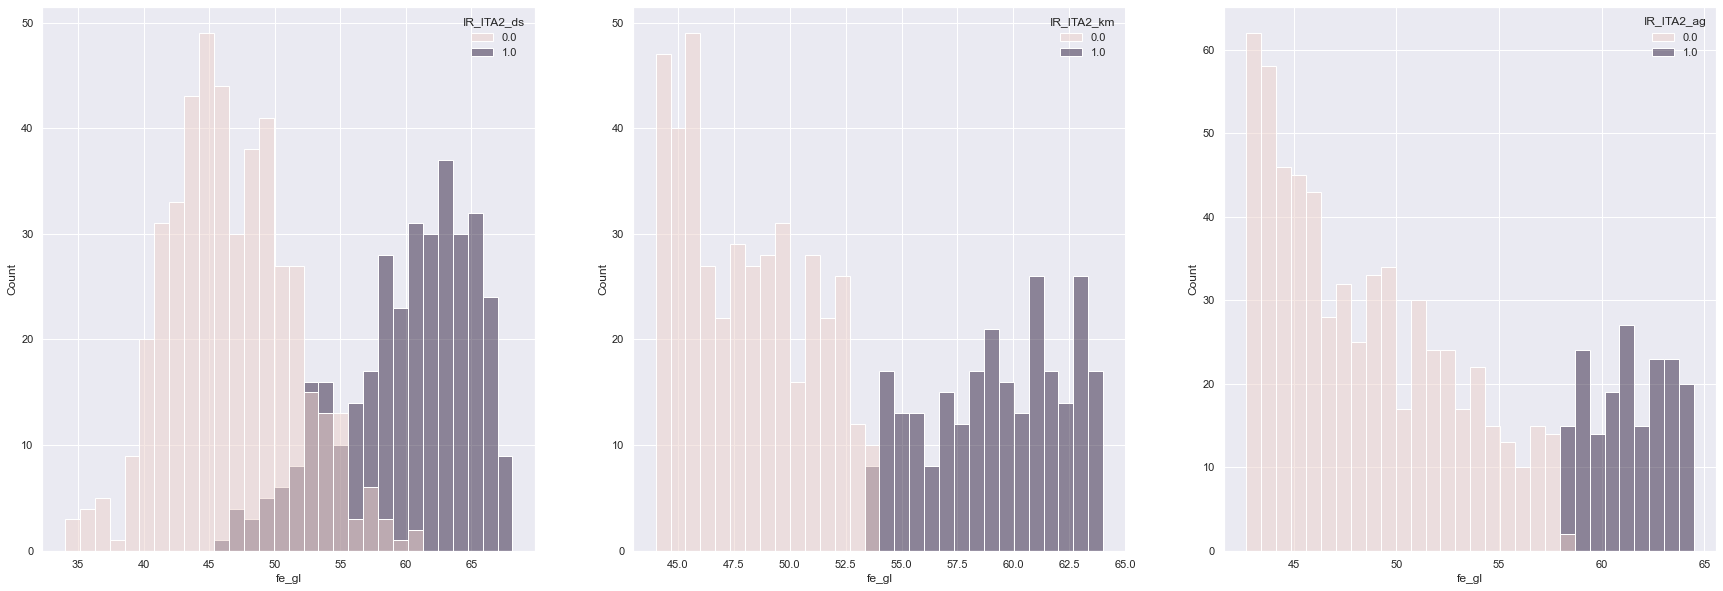

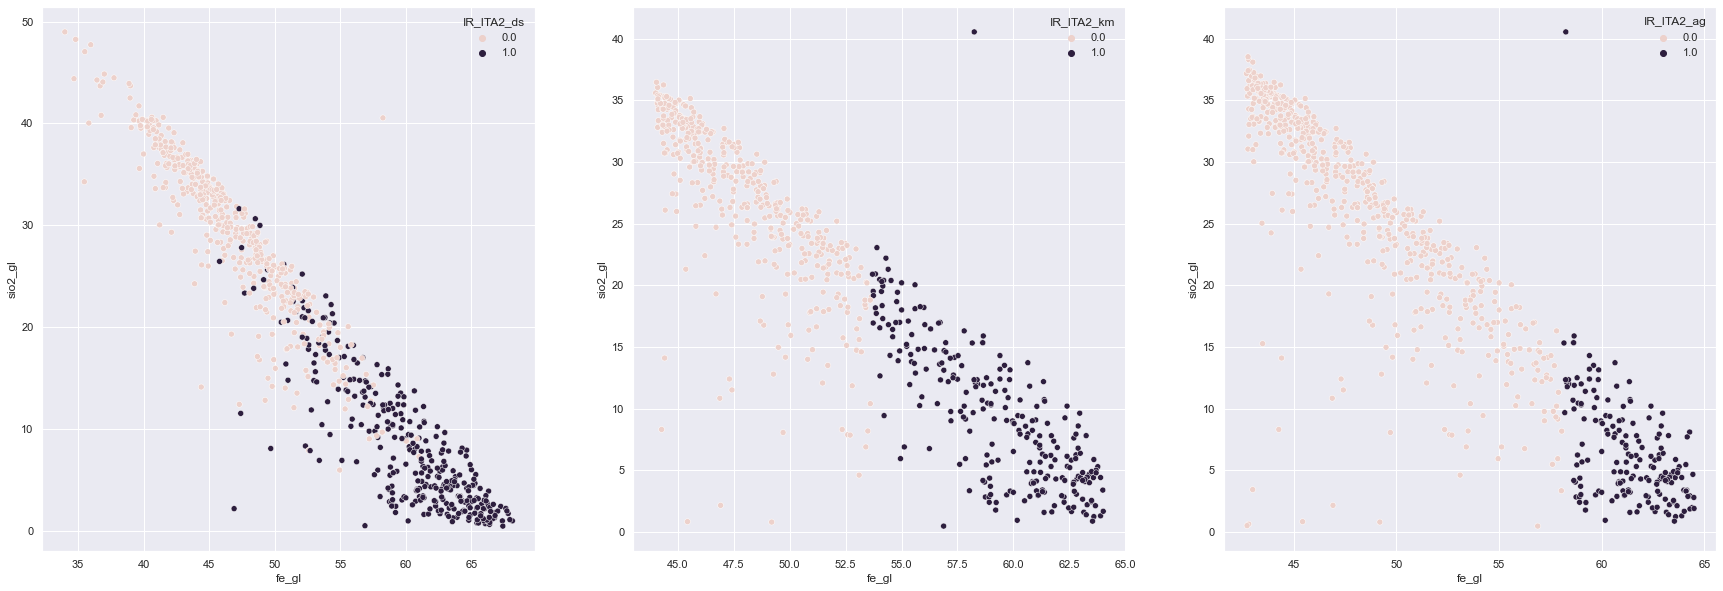

In [45]:
histograms(data, 'fe_gl', 'IR_ITA2_ds', 'IR_ITA2_km', 'IR_ITA2_ag')
scatter_plots(data, 'fe_gl', 'sio2_gl', 'IR_ITA2_ds', 'IR_ITA2_km', 'IR_ITA2_ag')

In [46]:
data['IR_ITA2_ds'].replace({1:"IR",0:"ITA"},inplace=True)
data['IR_ITA2_km'].replace({1:"IR",0:"ITA"},inplace=True)
data['IR_ITA2_ag'].replace({1:"IR",0:"ITA"},inplace=True)

In [47]:
df_ITA3_ds = data.query('HM_ITA3_ds != "HM" & IR_ITA2_ds != "IR"')
df_ITA3_km = data.query('HM_ITA3_km != "HM" & IR_ITA2_km != "IR"')
df_ITA3_ag = data.query('HM_ITA3_ag != "HM" & IR_ITA2_ag != "IR"')

In [48]:
# o primeiro datafram tem q ter menos rows que o último, pois o segundo não foram classificadas todas amostras!! 

print(df_ITA1_ds.shape)
print(df_ITA2_ds.shape)
print(df_ITA3_ds.shape)

(2880, 35)
(805, 38)
(2536, 40)


In [49]:
for i in n_clus:

    run_dsclus(df_ITA3_ds, var2, i, IC_ITA_ds, data, 'IC_ITA_ds')
    run_kmeans(df_ITA3_km, var2, i, IC_ITA_km, data, 'IC_ITA_km')
    run_aggl(df_ITA3_ag, var2, i, IC_ITA_ag, data, 'IC_ITA_ag')


Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

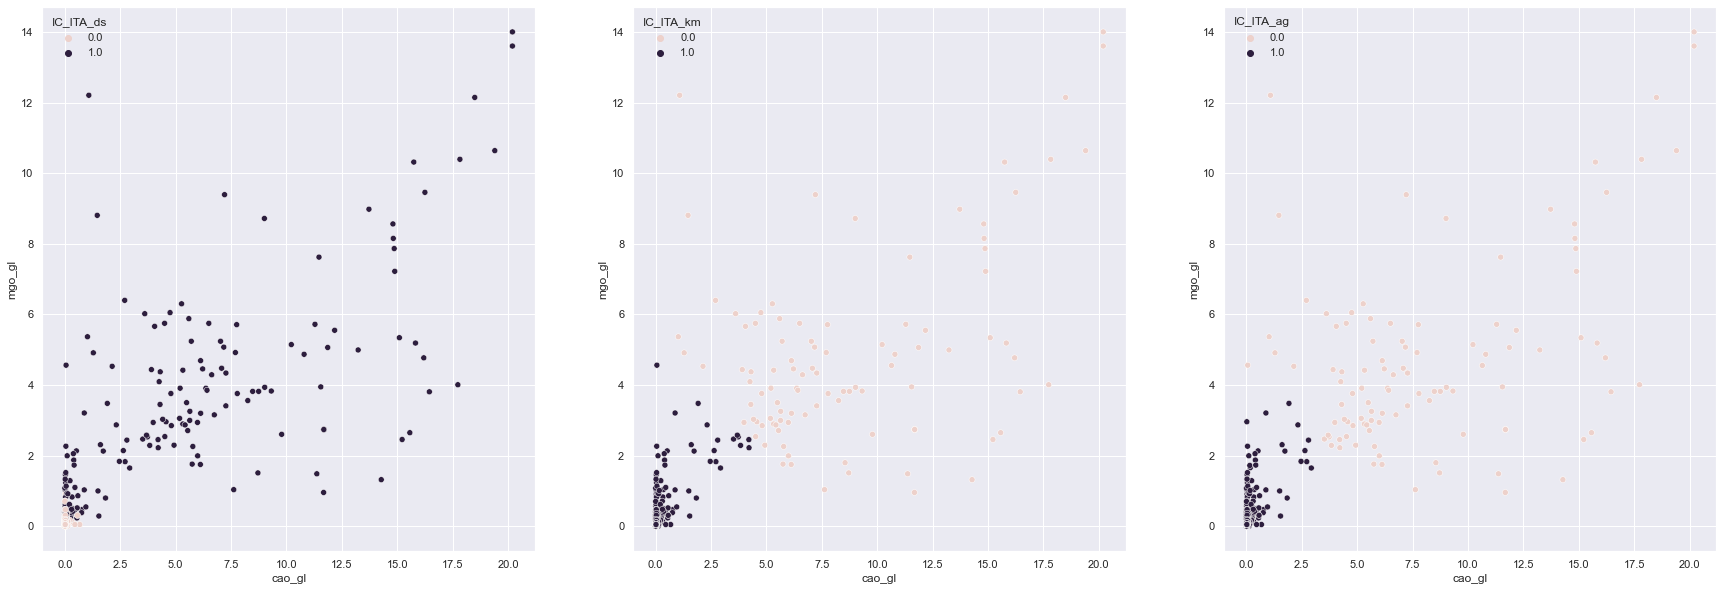

In [50]:
scatter_plots(data, 'cao_gl', 'mgo_gl', 'IC_ITA_ds', 'IC_ITA_km', 'IC_ITA_ag')

In [51]:
data['IC_ITA_ds'].replace({1:"IC",0:"ITA"},inplace=True)
data['IC_ITA_km'].replace({0:"IC",1:"ITA"},inplace=True)
data['IC_ITA_ag'].replace({0:"IC",1:"ITA"},inplace=True)

In [52]:
df_ITA4_ds = data.query('HM_ITA3_ds != "HM" & IR_ITA2_ds != "IR" & IC_ITA_ds != "IC"')
df_ITA4_km = data.query('HM_ITA3_km != "HM" & IR_ITA2_km != "IR" & IC_ITA_km != "IC"')
df_ITA4_ag = data.query('HM_ITA3_ag != "HM" & IR_ITA2_ag != "IR" & IC_ITA_ag != "IC"')

In [53]:
print(df_ITA1_ds.shape)
print(df_ITA2_ds.shape)
print(df_ITA3_ds.shape)
print(df_ITA4_ds.shape)


(2880, 35)
(805, 38)
(2536, 41)
(2301, 43)


In [54]:
for i in n_clus:

    run_dsclus(df_ITA4_ds, var3, i, IM_ITA_ds, data, 'IM_ITA_ds')
    run_kmeans(df_ITA4_km, var3, i, IM_ITA_km, data, 'IM_ITA_km')
    run_aggl(df_ITA4_ag, var3, i, IM_ITA_ag, data, 'IM_ITA_ag')


Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

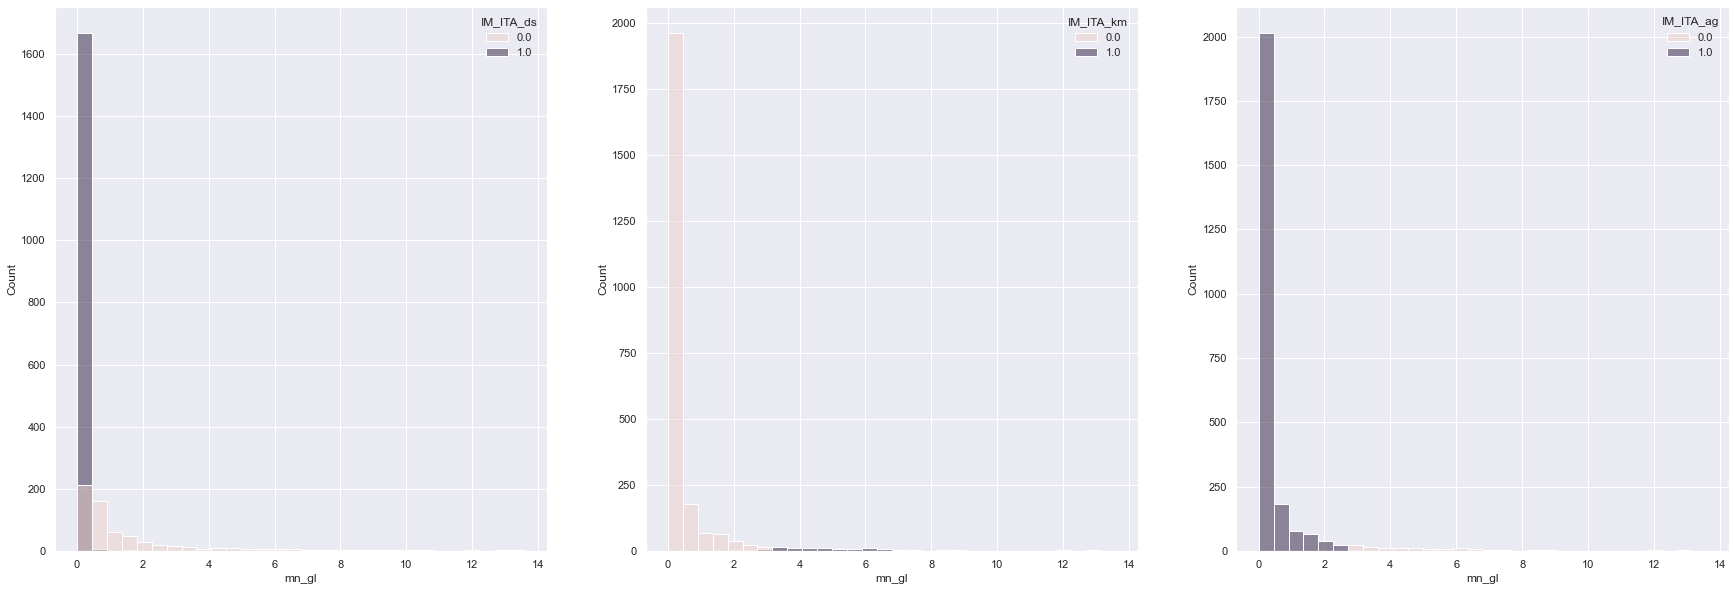

In [55]:
histograms(data, 'mn_gl', 'IM_ITA_ds', 'IM_ITA_km', 'IM_ITA_ag')

In [56]:
data['IM_ITA_ds'].replace({0:"IM",1:"ITA"},inplace=True)
data['IM_ITA_km'].replace({1:"IM",0:"ITA"},inplace=True)
data['IM_ITA_ag'].replace({0:"IM",1:"ITA"},inplace=True)

In [57]:
df_ITA5_ds = data.query('HM_ITA3_ds != "HM" & IR_ITA2_ds != "IR" & IC_ITA_ds != "IC" & IM_ITA_ds != "IM"')
df_ITA5_km = data.query('HM_ITA3_km != "HM" & IR_ITA2_km != "IR" & IC_ITA_km != "IC" & IM_ITA_km != "IM"')
df_ITA5_ag = data.query('HM_ITA3_ag != "HM" & IR_ITA2_ag != "IR" & IC_ITA_ag != "IC" & IM_ITA_ag != "IM"')

In [58]:
print(data.shape)
print(df_ITA1_ds.shape)
print(df_ITA2_ds.shape)
print(df_ITA3_ds.shape)
print(df_ITA4_ds.shape)    
print(df_ITA5_ds.shape)  

(3011, 46)
(2880, 35)
(805, 38)
(2536, 41)
(2301, 44)
(1675, 46)


# lv 8: class 6

In [59]:
for i in n_clus:

    run_dsclus(df_ITA5_ds, var4, i, IG_IS_ds, data, 'IG_IS_ds')
    run_kmeans(df_ITA5_km, var4, i, IG_IS_km, data, 'IG_IS_km')
    run_aggl(df_ITA5_ag, var4, i, IG_IS_ag, data, 'IG_IS_ag')



Clusterings:   0%|          | 0/100 [00:00<?, ?it/s]

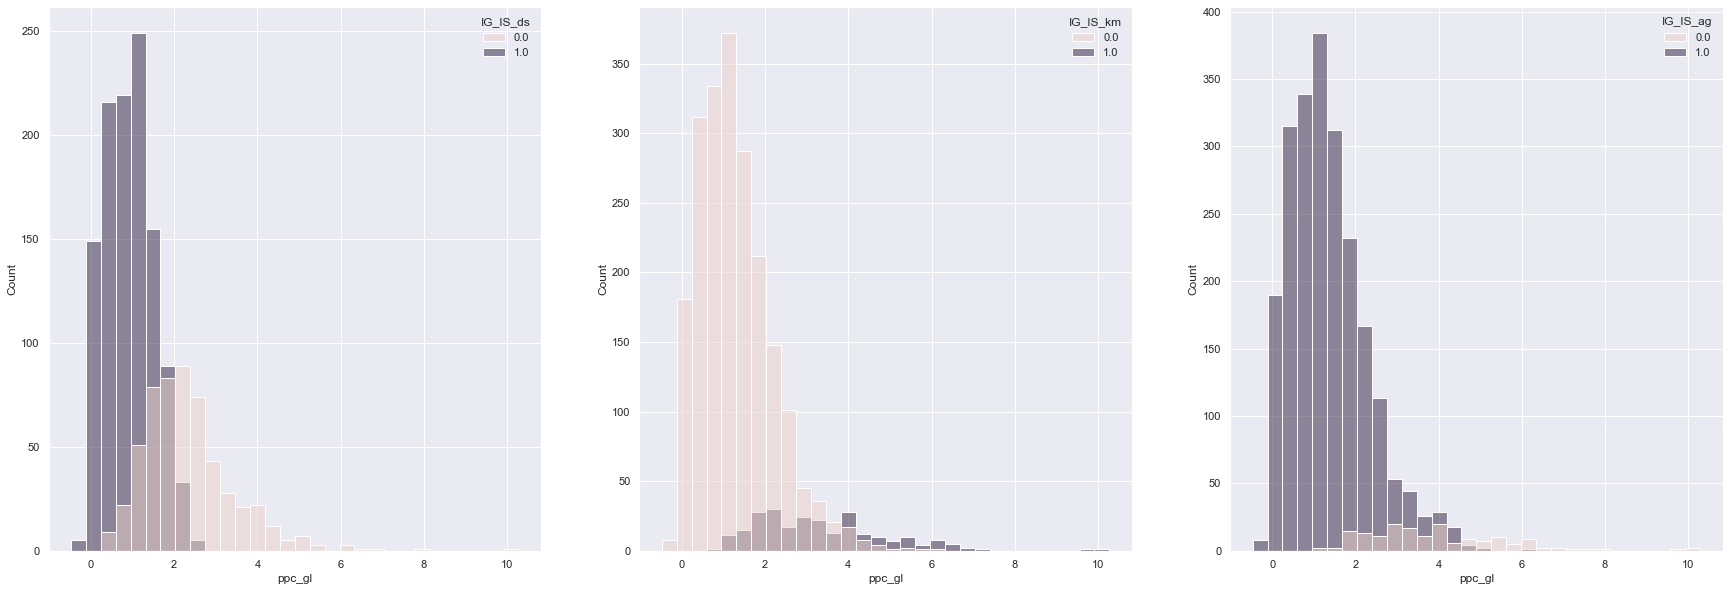

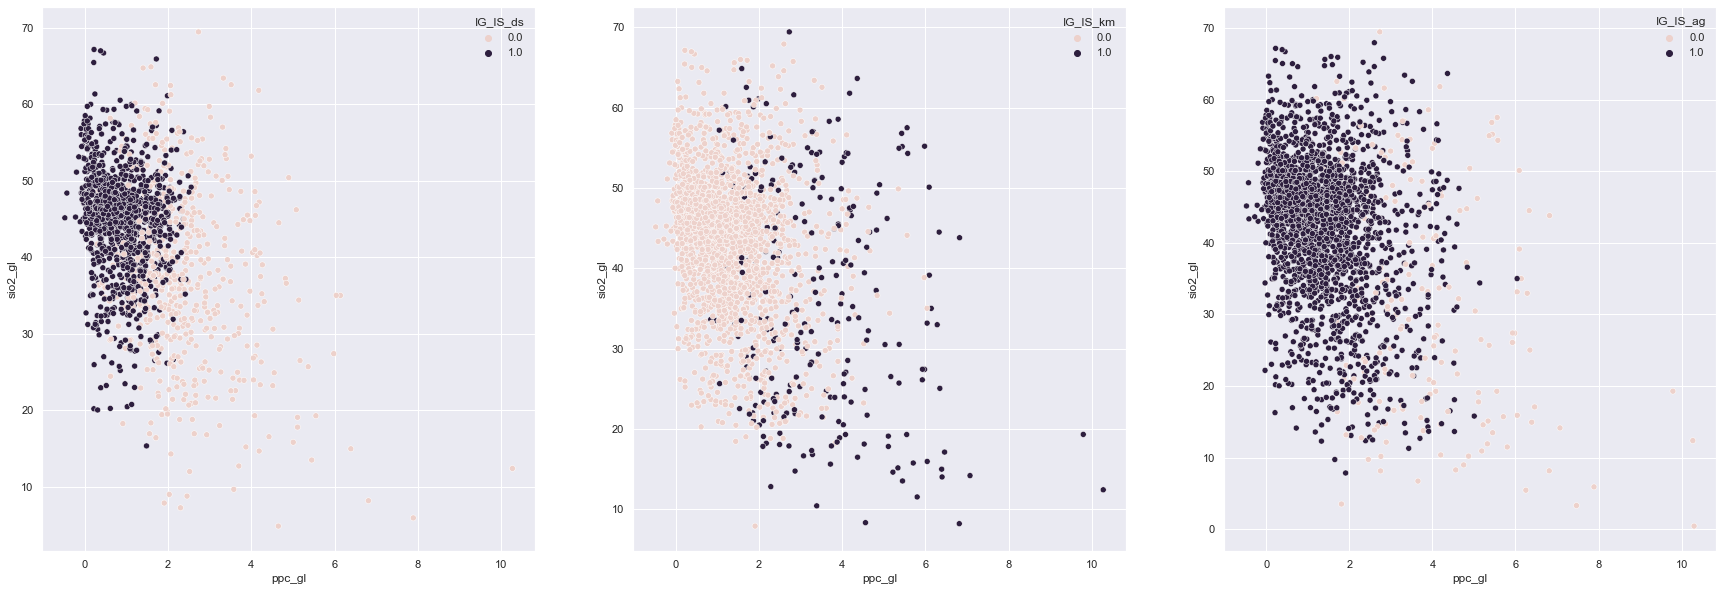

In [60]:
histograms(data, 'ppc_gl', 'IG_IS_ds', 'IG_IS_km', 'IG_IS_ag')
scatter_plots(data, 'ppc_gl', 'sio2_gl', 'IG_IS_ds', 'IG_IS_km', 'IG_IS_ag')

In [61]:
data['IG_IS_ds'].replace({0:"IG",1:"IS"},inplace=True)
data['IG_IS_km'].replace({1:"IG",0:"IS"},inplace=True)
data['IG_IS_ag'].replace({0:"IG",1:"IS"},inplace=True)


values = {'IG_IS_ds':'IS', 'IG_IS_km':'IS', 'IG_IS_ag':'IS'}

data.fillna(value=values)
data.replace({'ITA':np.nan}, inplace=True)

In [62]:
ds_col = ['HM_ITA3_ds', 'IR_ITA2_ds', 'IC_ITA_ds', 'IM_ITA_ds', 'IG_IS_ds']

km_col = ['HM_ITA3_km', 'IR_ITA2_km', 'IC_ITA_km', 'IM_ITA_km', 'IG_IS_km']

ag_col = ['HM_ITA3_ag', 'IR_ITA2_ag', 'IC_ITA_ag', 'IM_ITA_ag', 'IG_IS_ag']

data['lito_ds'] = np.nan
data['lito_km'] = np.nan
data['lito_ag'] = np.nan

for column in data[ds_col].columns:
    if column == 'lito_ds':
        continue
    data['lito_ds'].fillna(data[column], inplace=True)


for column in data[km_col].columns:
    if column == 'lito_km':
        continue
    data['lito_km'].fillna(data[column], inplace=True)


for column in data[ag_col].columns:
    if column == 'lito_ag':
        continue
    data['lito_ag'].fillna(data[column], inplace=True)

In [63]:
data.to_csv('output.csv')

In [108]:
d = {'davis-boudin-km':db_km, 'davis-boudin-ag':db_ag, 'davis-boudin-ds':db_ds, 'calinszki-ha-km':ch_km, 'calinszki-ha-ag':ch_ag,
    'calinszki-ha-ds':ch_ds, 'sillhoutes-km':sl_km, 'sillhoutes-ag':sl_ag, 'sillhoutes-ds':sl_ds, 'inertia_km':in_km}

df= pd.DataFrame(d)

#df.to_csv('cluster_metrics.csv', index=False)

ValueError: All arrays must be of the same length

In [107]:
d_h_km = pd.DataFrame(h_km, columns=['WCSS_km', 'Spatial Entropy_km'])
d_h_ag = pd.DataFrame(h_ag, columns=['WCSS_ag', 'Spatial_Entropy_ag'])
d_h_ds = pd.DataFrame(h_ds, columns=['WCSS_ds', 'Spatial_Entropy_ds'])


perfomances = pd.concat([d_h_km, d_h_ag, d_h_ds], axis=1)

perfomances.to_csv('performance_metrics.csv', index=False)

In [110]:
len(in_km)

7